In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
plt.style.use('seaborn-talk')

In [6]:
def extract_date(r):
    return  pd.to_datetime(str(r['Year']) + str(r['variable']), format='%Y%b')

In [7]:
total_nonfarm_hires = pd.melt(pd.read_excel('data/jolts_total_nonfarm.xlsx', skiprows=range(10), header=1),
                              id_vars='Year').assign(
    Date = lambda x : [extract_date(row) for _, row in x.iterrows()]).set_index('Date').drop(
    ['Year', 'variable'], axis=1).resample('Q').sum()
total_nonfarm_hires.columns = ['total_nonfarm_hires']
total_nonfarm_hires.drop(total_nonfarm_hires.tail(1).index, inplace=True)

In [17]:
total_nonfarm_hires.head()

,total_nonfarm_hires
Date,
2006-03-31,15897.0
2006-06-30,15880.0
2006-09-30,15794.0
2006-12-31,15930.0
2007-03-31,15827.0


In [8]:
employment_data = pd.melt(pd.read_excel('data/ces_employment_total_private_seasonaly_adjusted.xlsx', 
                                        skiprows=11, header=1), id_vars='Year').assign(
    Date = lambda x : [extract_date(row) for _, row in x.iterrows()]).set_index('Date').drop(
    ['Year', 'variable'], axis=1).resample('Q').last()
employment_data.columns = ['employment']

In [9]:
cps_employment = pd.read_excel('data/cps_employment_unemployment.xlsx', sheetname=0,
                                    skiprows=18, header=0)[['Label', 'Observation Value']].set_index('Label')
cps_employment.index = pd.to_datetime(cps_employment.index)
cps_employment.columns = ['unemployment']
cps_employment = cps_employment.resample('Q').last()

In [10]:
cps_employment.head()

,unemployment
Label,
1948-03-31,4.0
1948-06-30,3.6
1948-09-30,3.8
1948-12-31,4.0
1949-03-31,5.0


In [11]:
data = pd.concat([total_nonfarm_hires, employment_data, cps_employment], axis=1, join='inner')

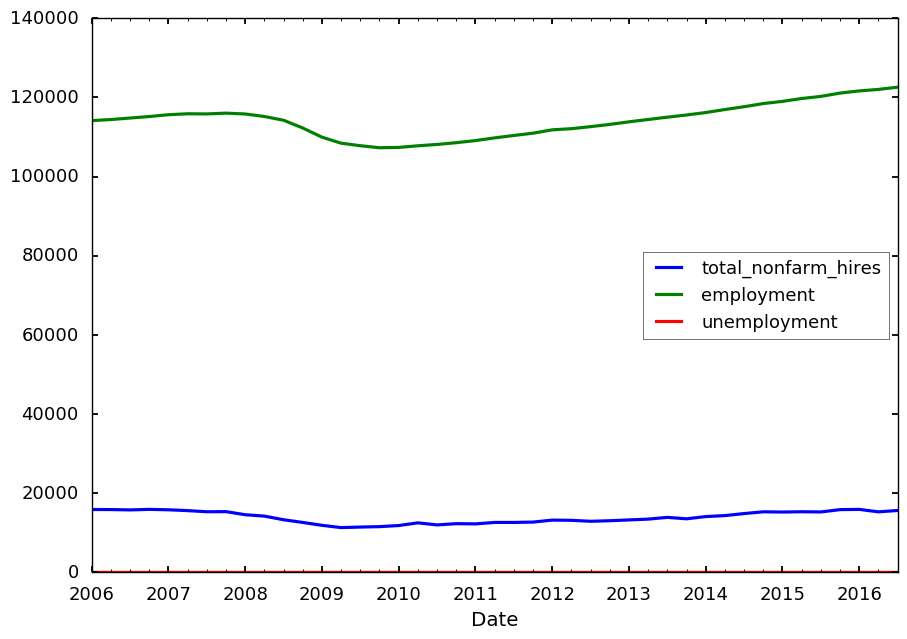

In [12]:
data.plot()

In [13]:
data = data.assign(hires= lambda x: x['total_nonfarm_hires'] / x['employment'])

In [14]:
data.head()

,total_nonfarm_hires,employment,unemployment,hires
Date,,,,
2006-03-31,15897.0,114146.0,4.7,0.139269
2006-06-30,15880.0,114415.0,4.6,0.138793
2006-09-30,15794.0,114801.0,4.5,0.137577
2006-12-31,15930.0,115178.0,4.4,0.138308
2007-03-31,15827.0,115636.0,4.4,0.136869


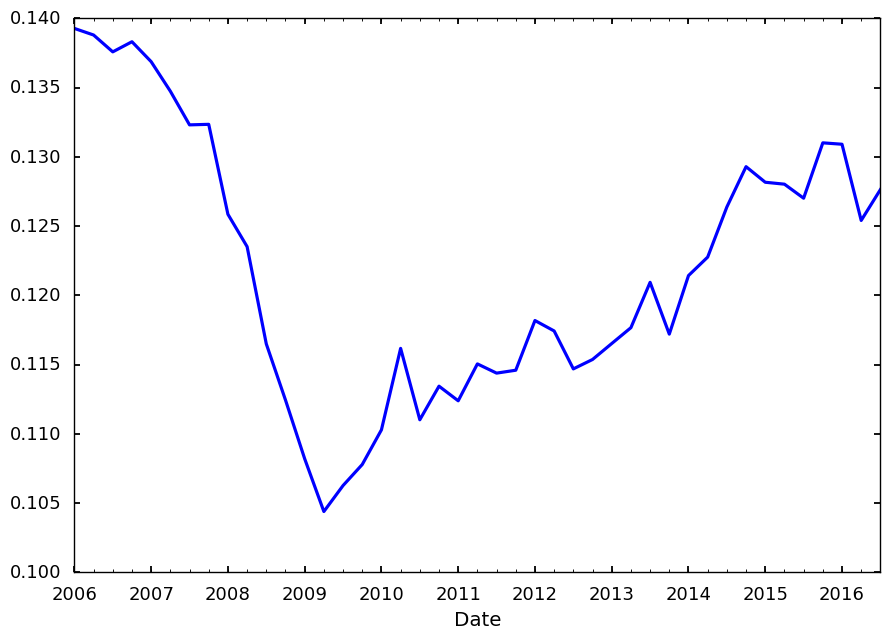

In [15]:
data['hires'].plot()